In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib.inline
sns.set(style='darkgrid')

#QUESTIONS I WANT TO ANSWER:
How do prices of listings vary by location?
How does the demand for Airbnb rentals fluctuate across the year and over years?
Are the demand and prices of the rentals correlated?
What are the different types of properties in NYC? Do they vary by neighborhood?
What localities in NYC are rated highly by guests?

Can you count something interesting?
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
Can you make a bar plot or a histogram?
Can you compare two related quantities?
Can you make a scatterplot?
Can you make a time-series plot?

In [2]:
data=pd.read_csv(r'C:\Users\guzel\Desktop\airbnb_NYC\listings.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
data.describe

<bound method NDFrame.describe of              id                                               name    host_id  \
0          2595                              Skylit Midtown Castle       2845   
1          3831                    Cozy Entire Floor of Brownstone       4869   
2          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
3          5121                                    BlissArtsSpace!       7356   
4          5178                   Large Furnished Room Near B'way        8967   
...         ...                                                ...        ...   
50594  40570168    Happy, accommodating,confortable & súper CLEAN!  314364722   
50595  40570350                      Cozy Modern Cottage Apartment   61835657   
50596  40570935  Súper clean, super confortable,súper ACCOMMODA...  314364722   
50597  40572303                                 Captivating Room C  219544415   
50598  40584021    Bright studio apartment with a lot of amenities   279437

In [6]:
data.isnull().sum()

id                                    0
name                                 17
host_id                               0
host_name                           563
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10220
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data.fillna({'reviews_per_month':0}, inplace=True)
data.reviews_per_month.isnull().sum()

0

In [8]:
data.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
data.neighbourhood.unique()

array(['Midtown', 'Clinton Hill', 'Murray Hill', 'Bedford-Stuyvesant',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope',
       'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea',
       'Crown Heights', 'East Harlem', 'Park Slope', 'Windsor Terrace',
       'Inwood', 'East Village', 'Harlem', 'Greenpoint', 'Bushwick',
       'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens',
       'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side',
       'Red Hook', 'Prospect Heights', 'Washington Heights', 'Woodside',
       'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands',
       'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO',
       'St. George', 'Tribeca', 'Highbridge', 'NoHo', 'Ridgewood',
       'Port Morris', 'Morningside Heights', 'Jamaica', 'Middle Village',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'Tompkinsville', 'Astoria',
       'Kensington', 'C

In [10]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

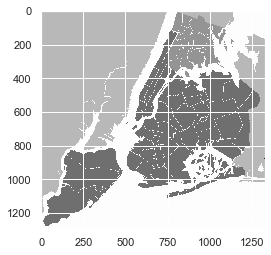

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('New_York_City_.png',0)
  
# Output Images 
plt.imshow(img)

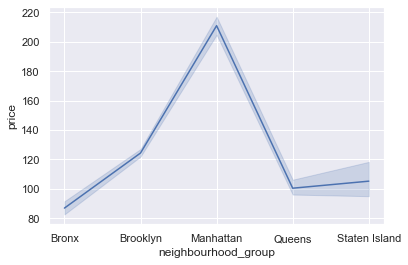

In [12]:
sns.lineplot(x=data.neighbourhood_group, y=data.price)

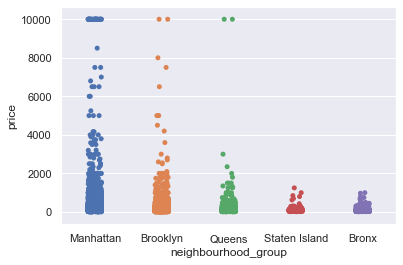

In [13]:
sns.stripplot(x=data.neighbourhood_group, y=data.price)

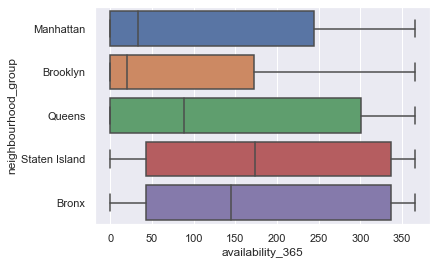

In [14]:
sns.boxplot(x=data.availability_365, y=data.neighbourhood_group)

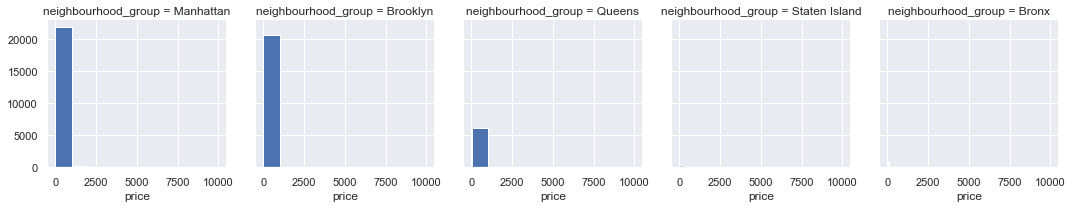

In [15]:
a= sns.FacetGrid(data, col='neighbourhood_group')
a.map(plt.hist, 'price')

In [16]:
#s= sns.PairGrid(data['room_type'])
#s.map(plt.scatter)

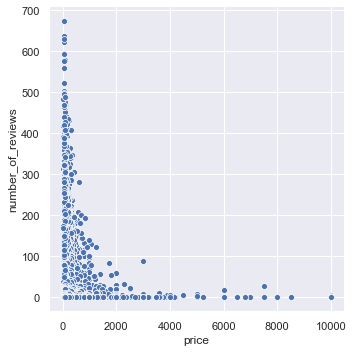

In [17]:
sns.relplot(x='price', y='number_of_reviews', data=data)
#i think I need to ignore the extreme prices

# The latitude of Central Park, New York, NY, USA is 40.785091, and the longitude is -73.968285


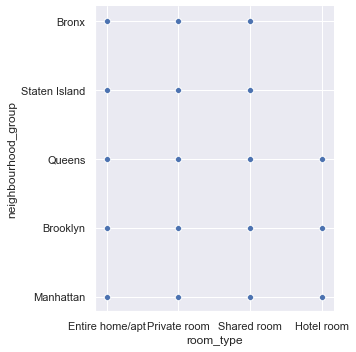

In [18]:
sns.relplot(x='room_type', y='neighbourhood_group', data=data)

In [19]:
import csv
from wordcloud import WordCloud

#read first column of csv file to string of words seperated
#by tab

your_list = []
your_list= '\t'.join([str(i) for i in data.name])

print(your_list)

Skylit Midtown Castle	Cozy Entire Floor of Brownstone	Large Cozy 1 BR Apartment In Midtown East	BlissArtsSpace!	Large Furnished Room Near B'way 	Cozy Clean Guest Room - Family Apt	Cute & Cozy Lower East Side 1 bdrm	Central Manhattan/near Broadway	Lovely Room 1, Garden, Best Area, Legal rental	West Village Nest - Superhost	Only 2 stops to Manhattan studio	Perfect for Your Parents + Garden	Chelsea Perfect  by Doti, an AIRBNB  Super Host!	Hip Historic Brownstone Apartment with Backyard	Huge 2 BR Upper East  Cental Park	Sweet and Spacious Brooklyn Loft	CBG CtyBGd HelpsHaiti rm#1:1-4	CBG Helps Haiti Room#2.5	CBG Helps Haiti Rm #2	MAISON DES SIRENES1,bohemian apartment	Sunny Bedroom Across Prospect Park	Magnifique Suite au N de Manhattan - vue Cloitres	SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM	Modern 1 BR / NYC / EAST VILLAGE	front room/double bed	Spacious 1 bedroom in luxe building	Loft in Williamsburg Area w/ Roof	back room/bunk beds	Large B&B Style rooms	Lovely room 2 & garden; Best ar

In [20]:
import csv
from wordcloud import WordCloud

word_list = []
word_list= '\t'.join([str(i) for i in data.name])

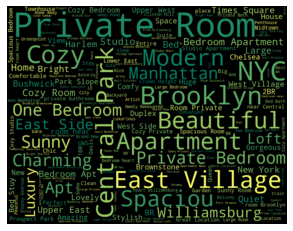

In [21]:
wordcloud = WordCloud(width=900, height=700, colormap="summer").generate(word_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
